In [5]:
import matplotlib.pyplot as plt
import numpy as np

def is_code_exec_on_cpu(edge):
    return edge[0]['device'] == 'cpu' and edge[1]['device'] == 'cpu'

def hist(data, title, interval=0.1):
    bins = np.arange(0, max(data) + interval, interval)
    n, bins, patches = plt.hist(data, bins=bins, alpha=0.7, rwidth=0.85)
    for patch in patches:
        height = patch.get_height()
        plt.annotate(f'{int(height)}',
                     (patch.get_x() + patch.get_width() / 2, height),
                     textcoords="offset points",
                     xytext=(0,5),
                     ha='center')
    plt.title(title)
    plt.xlabel('Execution Time (s)')
    plt.ylabel('Number')
    plt.show()

In [6]:
from imgdataconvertcodegen import _code_generator

kg = _code_generator.knowledge_graph
print(kg)

Knowledge Graph with 553 nodes and 6472 edges.


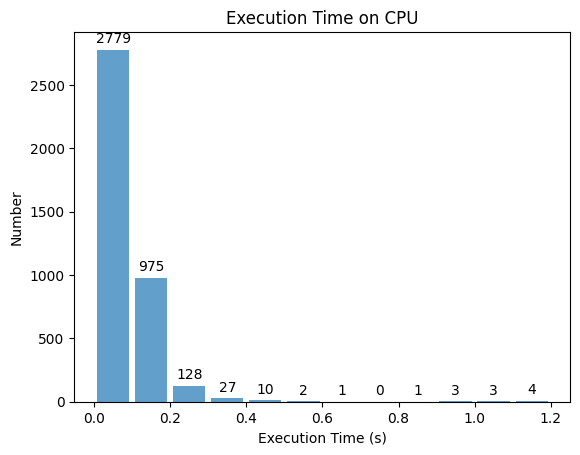

In [7]:
times = []
for edge in kg.edges:
    if is_code_exec_on_cpu(edge):
        times.append(kg.get_edge_data(edge[0], edge[1])['time_cost'])
hist(times, "Execution Time on CPU")

In [12]:
import math

times = []
for edge in kg.edges:
    if not is_code_exec_on_cpu(edge):
        times.append(kg.get_edge_data(edge[0], edge[1])['time_cost'])
hist(times, "Execution Time on GPU")

ValueError: Maximum allowed size exceeded